# Customer churn modelling
## Yaroslav Aulin
yaroslav.v.aulin@gmail.com

In [5]:
# load all required libraries

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# load dataset into pandas dataframe

churn_df = pd.read_csv("Churn_Modelling.csv")
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
# preprocessing: drop unnecessary columns
churn_df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
churn_df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [42]:
# replace male/female with 1/0
churn_df['Gender'] = (churn_df['Gender'] == 'Male').astype(int)
churn_df.head()



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [43]:
# encode categorical values as numerical using dummy variables
df1=pd.get_dummies(churn_df.Geography)
df1.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [44]:
# join dataframes
churn_df=churn_df.join(df1)
#drop Geography column
churn_df.drop('Geography',axis=1,inplace=True)
churn_df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [45]:
churn_df.dtypes

CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
France               uint8
Germany              uint8
Spain                uint8
dtype: object

In [47]:
churn_df.shape

(10000, 13)

In [49]:
# let's define X and y for the dataset
X=np.asarray(churn_df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','France','Germany','Spain']])
print(X[0:5])

y=np.asarray(churn_df['Exited'])
print(y[0:5])

[[6.1900000e+02 0.0000000e+00 4.2000000e+01 2.0000000e+00 0.0000000e+00
  1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0134888e+05 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [6.0800000e+02 0.0000000e+00 4.1000000e+01 1.0000000e+00 8.3807860e+04
  1.0000000e+00 0.0000000e+00 1.0000000e+00 1.1254258e+05 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [5.0200000e+02 0.0000000e+00 4.2000000e+01 8.0000000e+00 1.5966080e+05
  3.0000000e+00 1.0000000e+00 0.0000000e+00 1.1393157e+05 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [6.9900000e+02 0.0000000e+00 3.9000000e+01 1.0000000e+00 0.0000000e+00
  2.0000000e+00 0.0000000e+00 0.0000000e+00 9.3826630e+04 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.5000000e+02 0.0000000e+00 4.3000000e+01 2.0000000e+00 1.2551082e+05
  1.0000000e+00 1.0000000e+00 1.0000000e+00 7.9084100e+04 0.0000000e+00
  0.0000000e+00 1.0000000e+00]]
[1 0 1 0 0]


In [50]:
# normalize the dataset

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.32622142, -1.09598752,  0.29351742, -1.04175968, -1.22584767,
        -0.91158349,  0.64609167,  0.97024255,  0.02188649,  0.99720391,
        -0.57873591, -0.57380915],
       [-0.44003595, -1.09598752,  0.19816383, -1.38753759,  0.11735002,
        -0.91158349, -1.54776799,  0.97024255,  0.21653375, -1.00280393,
        -0.57873591,  1.74273971],
       [-1.53679418, -1.09598752,  0.29351742,  1.03290776,  1.33305335,
         2.52705662,  0.64609167, -1.03067011,  0.2406869 ,  0.99720391,
        -0.57873591, -0.57380915],
       [ 0.50152063, -1.09598752,  0.00745665, -1.38753759, -1.22584767,
         0.80773656, -1.54776799, -1.03067011, -0.10891792,  0.99720391,
        -0.57873591, -0.57380915],
       [ 2.06388377, -1.09598752,  0.38887101, -1.04175968,  0.7857279 ,
        -0.91158349,  0.64609167,  0.97024255, -0.36527578, -1.00280393,
        -0.57873591,  1.74273971]])

In [51]:
# split our dataset into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 12) (8000,)
Test set: (2000, 12) (2000,)


In [52]:
# modelling logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# predict using our dataset

yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
# predict churn probability for each case
# first column is probability of no churn, second column is probability of churn

yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.75422674, 0.24577326],
       [0.82616295, 0.17383705],
       [0.86631393, 0.13368607],
       ...,
       [0.69406114, 0.30593886],
       [0.63856806, 0.36143194],
       [0.85193061, 0.14806939]])

In [57]:
# Evaluate accuracy of our model using Jaccard index
# for perfect match the Jaccard index is 1.00, otherwise 0.00 

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)



0.822

Confusion matrix, without normalization
[[  91  305]
 [  51 1553]]


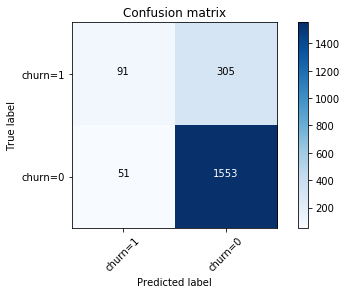

In [59]:
# let's have a look at the confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')




In [60]:
# classification report
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1604
           1       0.64      0.23      0.34       396

    accuracy                           0.82      2000
   macro avg       0.74      0.60      0.62      2000
weighted avg       0.80      0.82      0.79      2000

